Archivo : Solucion_Reto_SC_63_CarlosPatricio_LuisCastillo.ipynb

A continuación se desglosan los puntos del reto.

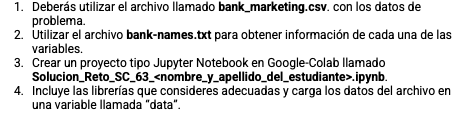

In [1]:
import pandas as pd

data = pd.read_excel('bank_marketing_RETO_DS_AS.xlsx')

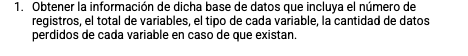

In [2]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9000.000000,9000,9000,9000,9000,9000.000000,9000,9000,9000,9000.000000,9000,9000.000000,9000.000000,9000.000000,9000.000000,9000,9000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1999,5124,4486,8865,NaN,4564,7820,6438,NaN,2361,NaN,NaN,NaN,NaN,6783,5213
mean,41.090556,NaN,NaN,NaN,NaN,1482.262778,NaN,NaN,NaN,15.619556,NaN,353.832778,2.520111,50.511333,0.788889,NaN,NaN
std,11.664253,NaN,NaN,NaN,NaN,3031.013197,NaN,NaN,NaN,8.345305,NaN,336.945158,2.737758,107.691963,2.210273,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,1.000000,NaN,3.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,8.000000,NaN,131.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,519.000000,NaN,NaN,NaN,15.000000,NaN,240.500000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1646.500000,NaN,NaN,NaN,21.000000,NaN,462.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [5]:
for column in data.columns:
    unique_count = data[column].nunique()
    dtype = data[column].dtype
    print(f"{column} : {unique_count} : {dtype}")

age : 74 : int64
job : 12 : object
marital : 3 : object
education : 4 : object
default : 2 : object
balance : 3476 : int64
housing : 2 : object
loan : 2 : object
contact : 3 : object
day : 31 : int64
month : 12 : object
duration : 1327 : int64
campaign : 34 : int64
pdays : 437 : int64
previous : 31 : int64
poutcome : 4 : object
y : 2 : object


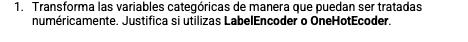

La justificación del uso de **LabelEnconder** se comprueba revisando que hay varias variables tipo "object" con una granularidad de 12 valores máximo lo cual hace que pueda crecer demasiado mi dataframe si uso **OHE**. Ademas de que las variables tipo "object" son valores que no implican números importantes en decisiones financieras, cuantificadores, etc.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9000 non-null   int64
 1   job        9000 non-null   int64
 2   marital    9000 non-null   int64
 3   education  9000 non-null   int64
 4   default    9000 non-null   int64
 5   balance    9000 non-null   int64
 6   housing    9000 non-null   int64
 7   loan       9000 non-null   int64
 8   contact    9000 non-null   int64
 9   day        9000 non-null   int64
 10  month      9000 non-null   int64
 11  duration   9000 non-null   int64
 12  campaign   9000 non-null   int64
 13  pdays      9000 non-null   int64
 14  previous   9000 non-null   int64
 15  poutcome   9000 non-null   int64
 16  y          9000 non-null   int64
dtypes: int64(17)
memory usage: 1.2 MB


In [8]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,4.500778,1.199778,1.267000,0.015000,1482.262778,0.492889,0.131111,0.504889,15.619556,5.462667,353.832778,2.520111,50.511333,0.788889,2.481111,0.420778
std,11.664253,3.233238,0.625139,0.745651,0.121559,3031.013197,0.499977,0.337541,0.830962,8.345305,3.147263,336.945158,2.737758,107.691963,2.210273,1.009169,0.493711
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,109.000000,0.000000,0.000000,0.000000,8.000000,3.000000,131.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,519.000000,0.000000,0.000000,0.000000,15.000000,6.000000,240.500000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1646.500000,1.000000,0.000000,1.000000,21.000000,8.000000,462.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3253.000000,58.000000,850.000000,58.000000,3.000000,1.000000


In [9]:
for column in data.columns:
    unique_count = data[column].nunique()
    dtype = data[column].dtype
    print(f"{column} : {unique_count} : {dtype}")

age : 74 : int64
job : 12 : int64
marital : 3 : int64
education : 4 : int64
default : 2 : int64
balance : 3476 : int64
housing : 2 : int64
loan : 2 : int64
contact : 3 : int64
day : 31 : int64
month : 12 : int64
duration : 1327 : int64
campaign : 34 : int64
pdays : 437 : int64
previous : 31 : int64
poutcome : 4 : int64
y : 2 : int64


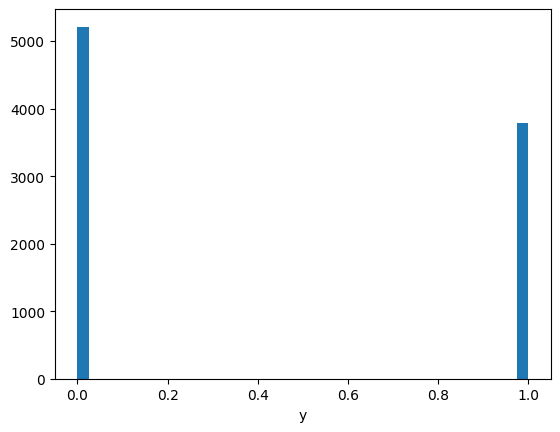

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y = np.array(data["y"])

plt.hist(y, bins=40)
plt.xlabel("y")
plt.show()

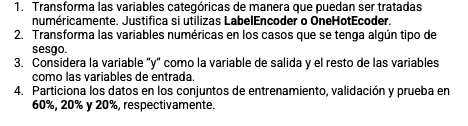

In [11]:
#Empieza análisis. Se conforman los conjuntos de entrada y salida X y Y.

X = data.drop('y', axis=1)

Y = data['y']

X = X.values

Y = Y.values

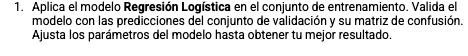

In [12]:
#Se inicializan las particiones para entrenar, probar y validar

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def InitSplit(population_size, test_size, validation_size):

  x_train_validation, x_test, y_train_validation, y_test = \
    train_test_split(X, Y, test_size = test_size/population_size, random_state=42)

  x_train, x_validation, y_train, y_validation = \
   train_test_split(x_train_validation, y_train_validation, test_size=(validation_size/(population_size - test_size)), random_state=42)

  #Scale features
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)
  x_validation = scaler.transform(x_validation)

  print("Dimensión X_train:\t\t", x_train.shape)
  print("Dimensión X_validation:\t\t", x_validation.shape)
  print("Dimension X_test:\t\t", x_test.shape)

  print("\nDimensión Y_train:\t\t", y_train.shape)
  print("Dimensión Y_validation:\t\t", y_validation.shape)
  print("Dimensión Y_test:\t\t", y_test.shape)

  return (x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation)

In [13]:
#Funcion de Regresión Logística

def LRegression(x_train, y_train, max_iter, c, solver):

  modelo_RL = LogisticRegression( C=c, solver=solver, max_iter=max_iter, random_state=42 )
  modelo_RL.fit( x_train, y_train )

  return (modelo_RL)

In [14]:
#Funcion de Regresión Logística Promedio. Se itera "n" veces para obtener el promedio

def MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, max_iter, c, solver):

  exactitud = []

  n = 10

  for k in range(0,n):
    x_train, x_validation, y_train, y_validation = \
    train_test_split(x_train_validation, y_train_validation, test_size=(VALIDATION_SIZE/(POPULATION_SIZE - TEST_SIZE)))

    modelo_RL = LRegression(x_train, y_train, max_iter, c, solver ) #Aqui no se debe ejecutar con random_state

    # veamos cómo se comportan ahora en el conjunto de validación:
    exactitud.append(modelo_RL.score(x_validation, y_validation))
  return(exactitud)


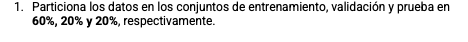

In [15]:
#Variables globales de la primera prueba

POPULATION_SIZE = 9000
TEST_SIZE = 1800
VALIDATION_SIZE = 1800
TRAIN_SIZE = POPULATION_SIZE - (TEST_SIZE + VALIDATION_SIZE)
MAX_ITER = 800
C = 0.1
SOLVER = 'newton-cg'

In [16]:
x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation = InitSplit(POPULATION_SIZE, TEST_SIZE, VALIDATION_SIZE)

Dimensión X_train:		 (5400, 16)
Dimensión X_validation:		 (1800, 16)
Dimension X_test:		 (1800, 16)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


In [17]:
modelo_RL = LRegression(x_train, y_train, MAX_ITER, C, SOLVER)

print("Exactitud (accuracy) con el conjunto de Validación = ", \
      modelo_RL.score(x_validation, y_validation))

exactitud = MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, MAX_ITER, C, SOLVER)

print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (accuracy) con el conjunto de Validación =  0.7938888888888889
Exactitud (Accuracy) promedio: 0.788
y desviación estándar: 0.010352431574570912


In [18]:
#Variables globales de la segunda prueba con movimiento de hiperparámetros

POPULATION_SIZE = 9000
TEST_SIZE = 2000
VALIDATION_SIZE = 1000
TRAIN_SIZE = POPULATION_SIZE - (TEST_SIZE + VALIDATION_SIZE)
MAX_ITER = 2000
C = 0.01
SOLVER = 'newton-cg'

In [19]:
x_train, x_test, x_validation, y_train, y_test, y_validation, x_train_validation, y_train_validation = InitSplit(POPULATION_SIZE, TEST_SIZE, VALIDATION_SIZE)

Dimensión X_train:		 (6000, 16)
Dimensión X_validation:		 (1000, 16)
Dimension X_test:		 (2000, 16)

Dimensión Y_train:		 (6000,)
Dimensión Y_validation:		 (1000,)
Dimensión Y_test:		 (2000,)


In [20]:
modelo_RL = LRegression(x_train, y_train, MAX_ITER, C, SOLVER)

print("Exactitud (accuracy) con el conjunto de Validación = ", \
      modelo_RL.score(x_validation, y_validation))

exactitud = MeanLRegression(x_train, x_validation, y_train, y_validation, x_train_validation, y_train_validation, MAX_ITER, C, SOLVER)

print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (accuracy) con el conjunto de Validación =  0.807
Exactitud (Accuracy) promedio: 0.7899
y desviación estándar: 0.008549268974596607


In [21]:
from sklearn.metrics import confusion_matrix

def Confusion_Matrix(model, x_test, y_test):
  pr = model.predict(x_test)

  print(confusion_matrix(y_test, pr))
  return(pr)

In [22]:
predict = Confusion_Matrix(modelo_RL, x_test, y_test)

[[987 146]
 [274 593]]


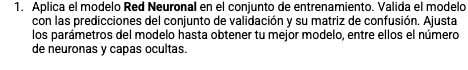

In [23]:
from sklearn.neural_network import MLPClassifier

def MLP_Classifier(x_train, x_validation, y_train, y_validation, hidden_layer_sizes, max_iter):

  modelo_NN = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
  modelo_NN.fit(x_train, y_train)

  print(modelo_NN.score (x_validation, y_validation))
  return(modelo_NN)

In [24]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLPClassifier(hidden_layer_sizes=(15, 4), max_iter=700, random_state=42)
modelo_NN.fit(x_train, y_train)

print(modelo_NN.score (x_validation, y_validation))

0.829


In [25]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLP_Classifier(x_train, x_validation, y_train, y_validation, (15,4), 700)

0.829


In [26]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLP_Classifier(x_train, x_validation, y_train, y_validation, (10, ), 500)

0.827


In [27]:
from sklearn.neural_network import MLPClassifier

predict = Confusion_Matrix(modelo_NN, x_test, y_test)

[[950 183]
 [193 674]]


In [28]:
from sklearn.neural_network import MLPClassifier

print(np.square(np.subtract(y_test, predict)).mean())

0.188


In [29]:
epsilon = 1e-8
print(np.mean(np.abs((y_test - predict) / (y_test + epsilon))) * 100)

915000009.65


In [30]:
# Coeficiente de Pearson:

print(np.corrcoef(y_test, predict) [0,1])

0.6167422567728691


In [31]:
# Similiaridad del coseno:

np.dot(y_test, predict) / (np.linalg.norm(y_test) * np.linalg.norm(predict))

0.7819157062415435

In [32]:
#Inicio de ejercicio para ajustar los Hiperparámetros

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
  train_test_split(X, Y, train_size=.60, random_state=42)

#Scale features
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print("Dimensión X_train_set:\t\t", x_train.shape)
print("Dimension X_test_set: \t\t", x_test.shape)
print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 16)
Dimension X_test_set: 		 (3600, 16)

Dimensión Y_train:		 (5400,)
Dimensión Y_test:		 (3600,)


In [33]:
#Entrenamiento con modelo_RL_base

import numpy as np
from sklearn.linear_model import LogisticRegression

modelo_RL_base = LogisticRegression (random_state=5)
print(modelo_RL_base)

#modelo_RL_base2 = valores default =
LogisticRegression (C=1.0, class_weight=None, dual=False, fit_intercept=True,
  intercept_scaling=1, l1_ratio=None, max_iter=100,
  n_jobs=None, penalty='l2',
  random_state=5, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)



LogisticRegression(random_state=5)


LogisticRegression(random_state=5)

In [34]:
#Entrenamiento con modelo_RL_base

from sklearn.linear_model import LogisticRegression

modelo_RL_base.fit(x_train, y_train)

#modelo_RL_base2.fit(x_train, y_train)

LogisticRegression(random_state=5)

In [35]:
#Score de aciertos en prediccion con modelo_RL_base

from sklearn.linear_model import LogisticRegression

modelo_RL_base.score(x_test, y_test)

0.7988888888888889

In [36]:
#Muestreo de los primeros 20 valores reales y predecidos

from sklearn.linear_model import LogisticRegression

print("Valores-etiquetas reales: %s" % y_test[0:20])
print(" Predicciones del modelo: %s" % modelo_RL_base.predict(x_test)[0:20])

Valores-etiquetas reales: [0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0]
 Predicciones del modelo: [0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0]


In [37]:
#Estimación de las predicciones erróneas

from sklearn.linear_model import LogisticRegression

pr = modelo_RL_base.predict(x_test)
sum(abs(y_test - pr)) / pr.shape[0]

0.2011111111111111

In [38]:
#Ajusto Hiperparámetros a valores no default
#En este caso max_iter=5, es un valor que lo hará no converger

from sklearn.linear_model import LogisticRegression

modelo_RL_hyper = LogisticRegression (C=.1,
  penalty='l2',
  solver='lbfgs',
  random_state=5,
  max_iter=5)

modelo_RL_hyper.fit(x_train, y_train)

print('Accuracy: %0.4f\n' % modelo_RL_hyper.score (x_test, y_test))

Accuracy: 0.7969



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Ajusto Hiperparámetros a valores no default
#ahora aumento max_iter=100, que es un valor que lo hará converger

from sklearn.linear_model import LogisticRegression

modelo_RL_tmp = LogisticRegression ( C=0.2,
  penalty='l2',
  solver='lbfgs',
  max_iter=100,
  random_state=17)

modelo_RL_tmp.fit( x_train, y_train)

print(modelo_RL_tmp.score(x_test, y_test))

0.7997222222222222


In [40]:
#Uso de malla (Grid) para sacar los mejores hiperparámetros

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Es posible obtener warnings y errores de salida a partir de los siguientes párametros candidatos
#porque hay combinaciones de parámetros no válidas

parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
  'penalty': ('l2','elasticnet', 'none'),
  'solver': ('newton-cg','saga','lbfgs','sag')}

RL_grid = LogisticRegression(max_iter=100)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)
modelo_RL_grid.fit(x_train, y_train)

print(modelo_RL_grid)
print("Los mejores valores encontrados son %s con un score de %0.2f" % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))
print(modelo_RL_grid.score (x_test, y_test))

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} con un score de 0.79
0.7980555555555555


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [53]:
#Probando los mejores parámetros encontrados en la malla (Grid)

from sklearn.linear_model import LogisticRegression

modelo_RL_tmp = LogisticRegression( C=0.1,
  penalty='l2',
  solver='newton-cg',
  max_iter=100)

modelo_RL_tmp.fit( x_train, y_train )

print(modelo_RL_tmp.score(x_test, y_test))

0.7980555555555555


In [54]:
model = modelo_RL_tmp

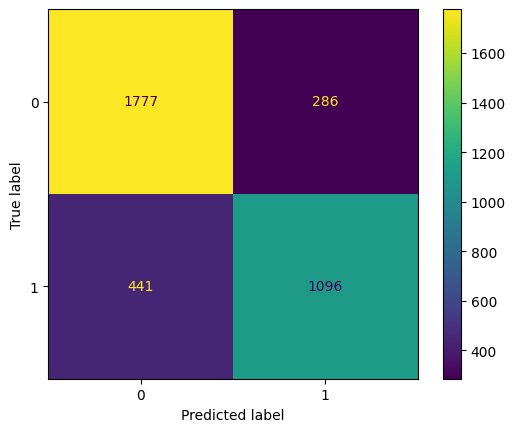

In [55]:
#from sklearn.metrics import plot_confusion_matrix --Older version, deprecated

#plot_confusion_matrix(model, X_test, y_test, labels=[0,1]) --Older version, deprecated

#!pip install scikit-learn --upgrade
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instead of using plot_confusion_matrix, use the following:
cm = confusion_matrix(y_test, model.predict(x_test), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [56]:
predict_tmp = Confusion_Matrix(model, x_test, y_test)

[[1777  286]
 [ 441 1096]]


In [57]:
print((1777+1096)/(1777+1096+286+441))

0.7980555555555555


In [ ]:
#Uso de malla (Grid) para sacar los mejores hiperparámetros

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#Es posible obtener warnings y errores de salida a partir de los siguientes párametros candidatos
#porque hay combinaciones de parámetros no válidas

parameters = {'hidden_layer_sizes':[(50,), (100,), (50, 50)],
  'activation': ['tanh','relu'],
  'solver': ['sgd','adam'],
  'learning_rate_init': [0.001, 0.01] }

mlp = MLPClassifier(max_iter=100)
clf = GridSearchCV(mlp, parameters, cv = 5)
clf.fit(x_train, y_train)

print(clf)
print("Los mejores valores encontrados son %s con un score de %0.2f" % (clf.best_params_, clf.best_score_))
print(clf.score (x_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['sgd', 'adam']})
Los mejores valores encontrados son {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'solver': 'sgd'} con un score de 0.82
0.8166666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


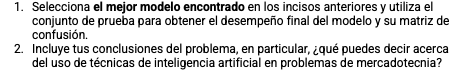

El mejor modelo lo da la búsqueda en el Grid de Neural Networks combinando a su vez la búsqueda del número de capaz ocultas con el número de neuronas. En este mismo archivo se demuestra ese hecho.

Esto demuestra que las técnicas de Inteligencia Artificial se ocupan para tomar decisiones financieras basadas en campañas de mercadotécnia.

In [42]:
from sklearn.neural_network import MLPClassifier

modelo_NN_tmp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=600, learning_rate_init = 0.01, solver = 'sgd')
modelo_NN_tmp.fit(x_train, y_train)

print(modelo_NN_tmp.score (x_validation, y_validation))

0.863


In [43]:
#Modelo Mejorado (ni Subentrenado ni Sobreentrenado) con MLP Classifier

from sklearn.datasets import make_classification
from sklearn. neural_network import MLPClassifier
import numpy as np

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

neuronas = [i for i in range(1, 50, 5)]

print(neuronas)

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:
  model = MLPClassifier(hidden_layer_sizes=(i,i),
    max_iter=600, learning_rate_init = 0.01, solver = 'sgd',
    alpha=0.7,
    random_state=42)

  model.fit(x_train, y_train)

  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = model.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  # Predicciones y métricas con el conjunto de prueba:
  test_yhat = model.predict(x_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)

  # evolución de las métricas durante el entrenamiento ...

  print('> %d...\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f'
    % (i, train_acc, test_acc, train_loss, test_loss))


(5400, 16) (3600, 16) (5400,) (3600,)
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
> 1...	 trainacc: 0.583, testacc: 0.573, trainloss: 0.417, testloss: 0.427
> 6...	 trainacc: 0.827, testacc: 0.815, trainloss: 0.173, testloss: 0.185
> 11...	 trainacc: 0.835, testacc: 0.818, trainloss: 0.165, testloss: 0.182
> 16...	 trainacc: 0.833, testacc: 0.825, trainloss: 0.167, testloss: 0.175
> 21...	 trainacc: 0.841, testacc: 0.821, trainloss: 0.159, testloss: 0.179
> 26...	 trainacc: 0.846, testacc: 0.821, trainloss: 0.154, testloss: 0.179
> 31...	 trainacc: 0.845, testacc: 0.818, trainloss: 0.155, testloss: 0.182
> 36...	 trainacc: 0.849, testacc: 0.823, trainloss: 0.151, testloss: 0.177
> 41...	 trainacc: 0.849, testacc: 0.823, trainloss: 0.151, testloss: 0.177
> 46...	 trainacc: 0.851, testacc: 0.817, trainloss: 0.149, testloss: 0.183


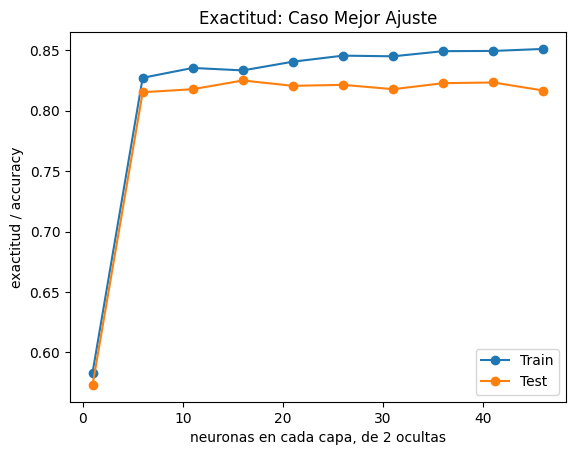

In [44]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud: Caso Mejor Ajuste')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

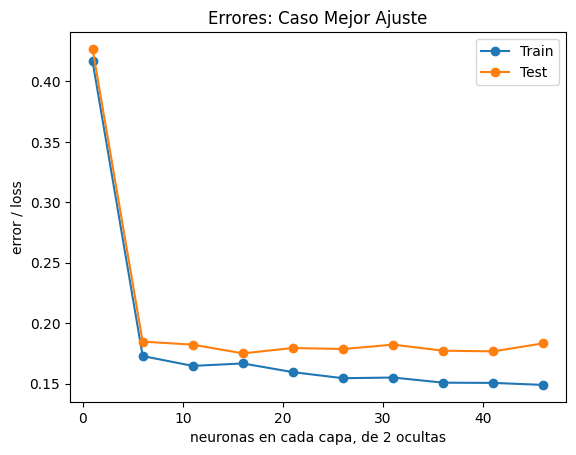

In [45]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores: Caso Mejor Ajuste')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('error / loss')
plt.show()

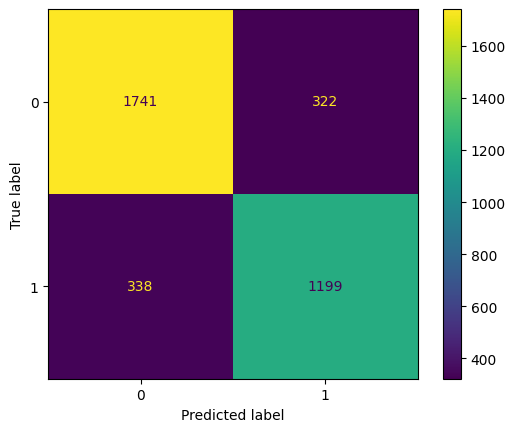

In [46]:
#from sklearn.metrics import plot_confusion_matrix --Older version, deprecated

#plot_confusion_matrix(model, X_test, y_test, labels=[0,1]) --Older version, deprecated

#!pip install scikit-learn --upgrade
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instead of using plot_confusion_matrix, use the following:
cm = confusion_matrix(y_test, model.predict(x_test), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [47]:
predict_tmp = Confusion_Matrix(model, x_test, y_test)

[[1741  322]
 [ 338 1199]]


In [48]:
print((1741+1199)/(1741+1199+338+322))

0.8166666666666667


In [49]:
predict_tmp = Confusion_Matrix(model, x_train, y_train)

[[2760  390]
 [ 414 1836]]


In [50]:
print((2760+1836)/(2760+1836+390+414))

0.8511111111111112


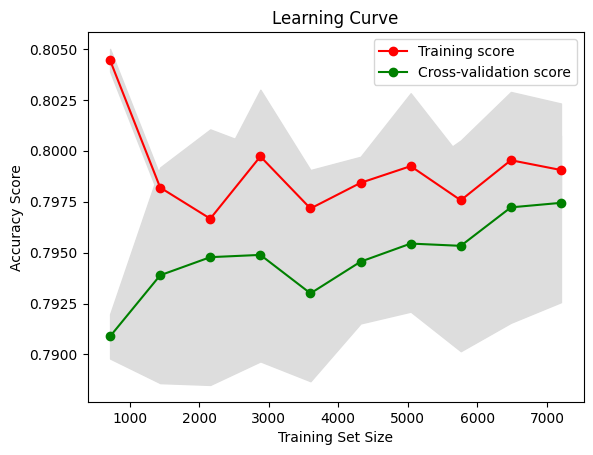

In [51]:
#Modelo Mejorado (ni Subentrenado ni Sobreentrenado) con Logistic Regression
#Código generado por CHATGPT

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1)

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the Learning Curves
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()

# Create a pipeline that includes scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression( C=0.1,
  penalty='l2',
  solver='newton-cg',
  max_iter=100))

# Assuming X and y are your features and target variable
plot_learning_curves(model, X, Y)



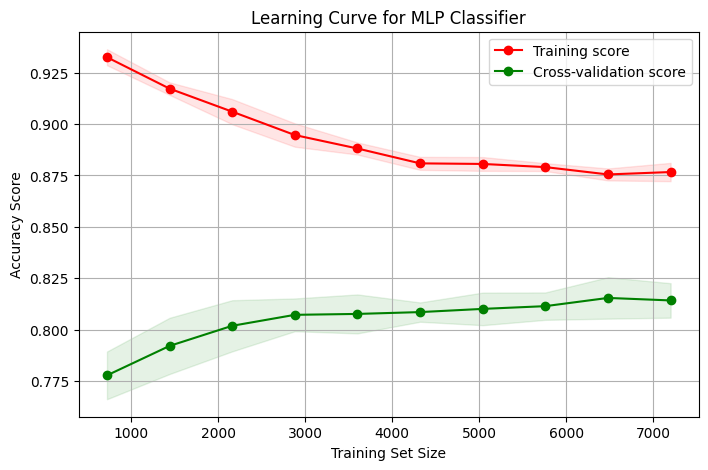

In [52]:
#Modelo Mejorado (ni Subentrenado ni Sobreentrenado) con MLP Classification
#Código generado por CHATGPT

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,  # Using 5-fold cross-validation
        scoring='accuracy',  # Metric for evaluation, can be adjusted based on the problem
        n_jobs=-1  # Use all computer cores
    )

    # Mean and standard deviation of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Mean and standard deviation of cross-validation set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.title("Learning Curve for MLP Classifier")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Create a pipeline with feature scaling and MLP Classifier
mlp_pipeline = make_pipeline(StandardScaler(),
                             MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42))

# Assuming X and y are your data features and target variable
plot_learning_curves(mlp_pipeline, X, Y)
